In [1]:
import torch
torch.cuda.empty_cache() 
from torchvision import transforms

import livia.embedding as embedding
import livia.triplet as triplet

import pandas as pd
import pickle
import os
import sys
import sklearn
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('./_7_image_embedding')

import _7_image_embedding.utility_functions  as uf
from sklearn.decomposition import PCA

if torch.cuda.is_available(): 
    device = "cuda" 
else: 
    device = "cpu"   

In [2]:
museum = "wm"
# specify run_name + log_dir + eval_dir + root directory
# root_dir -> where images are stored
root_dir = f'data_local/images/{museum}_cropped'
# log_dir + run_name
log_dir = "experiments/runs/from_server/"
run_name = 'grayscale_wm_pretrained_unfrozen_triplets=249996_size=224_bs=32_margin=1_epochs=10_lr=0.0001_noise=0.005'

In [3]:
evaluation_dir = f"evaluation_results/{run_name}/wm"

In [5]:
image_embedding = embedding.load_csv(evaluation_dir + "/image_embedding.csv")
hidden_states = image_embedding.embedding

In [6]:
x = hidden_states[:32]
np.sqrt(np.diag(x.dot(x.T)))

array([ 546.6916371 ,  439.88164186,  547.9571277 ,  250.49921244,
        476.01060817,  395.87258012,  582.00341711,  376.08195606,
        485.34719424,  542.62411454,  357.82458796,  494.47049096,
        328.57457746,  348.53717186,  556.75639818, 1375.0242803 ,
        670.88086289,  325.95293527,  768.90741499,  451.61000618,
        847.84301552,  581.40158559,  306.33747805,  494.27605473,
        417.79752713, 1155.067985  ,  508.50986028,  328.41746753,
        234.09221931,  584.08880376,  414.20940876,  493.71656256])

In [8]:
torch.linalg.norm(torch.tensor(x), dim=1)

tensor([ 546.6916,  439.8816,  547.9571,  250.4992,  476.0106,  395.8726,
         582.0034,  376.0820,  485.3472,  542.6241,  357.8246,  494.4705,
         328.5746,  348.5372,  556.7564, 1375.0243,  670.8809,  325.9529,
         768.9074,  451.6100,  847.8430,  581.4016,  306.3375,  494.2761,
         417.7975, 1155.0680,  508.5099,  328.4175,  234.0922,  584.0888,
         414.2094,  493.7166], dtype=torch.float64)

In [23]:
l1 = torch.nn.L1Loss()
lengths = torch.tensor(np.sqrt(np.diag(x.dot(x.T))))
l1(lengths, torch.ones(lengths.shape))

tensor(520.4771, dtype=torch.float64)

### PCA 

In [6]:
n = 50
pca = PCA(n_components=n)
pca.fit(hidden_states)

PCA(n_components=50)

In [7]:
explained_var_ratio = pca.explained_variance_ratio_

In [8]:
# how much variance is explained by the n dimensions with the largest variance
sum(explained_var_ratio)

0.999993479916977

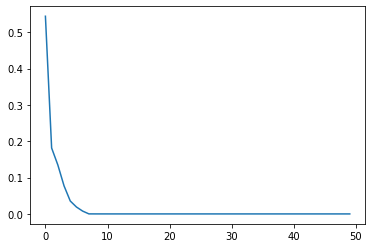

In [9]:
# plot expained variance ratio
plt.plot(explained_var_ratio)
plt.show()

In [10]:
sum(explained_var_ratio[:10])

0.9999111884145339

In [13]:
sum(explained_var_ratio[:10])

0.9999111884145339

### Pairwise distances

In [14]:
import numpy as np
rng = np.random.default_rng()

In [15]:
# randomly sample n embedding vectors to not run out of memory
n = 10000
hidden_states_sample = rng.choice(hidden_states, n, replace=False)

In [16]:
p_distances = sklearn.metrics.pairwise_distances(hidden_states_sample, metric='cosine')
p_distances.shape

(10000, 10000)

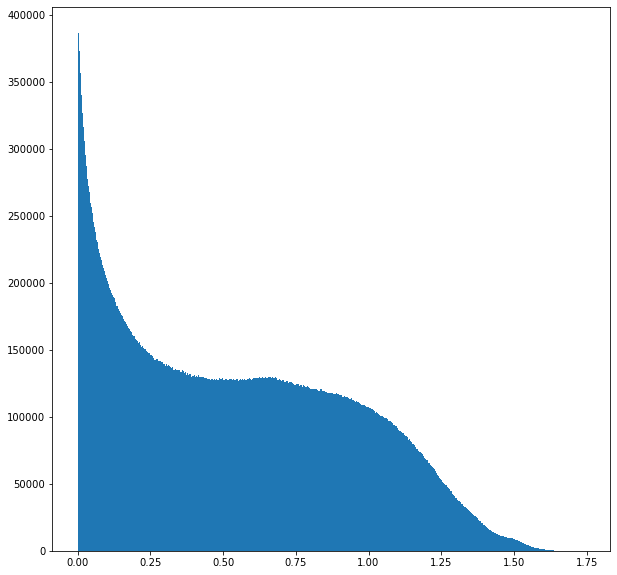

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(p_distances.flatten(), bins=1000)
plt.show()


In [18]:
embedding_loaded = embedding.load_csv("data_local/wm/wm_sbert_title_districts_subjects_512d.csv")

In [19]:
# randomly sample n embedding vectors to not run out of memory
n = 10000
hidden_states_sample = rng.choice(embedding_loaded.embedding, n, replace=False)

In [20]:
p_distances = sklearn.metrics.pairwise_distances(hidden_states_sample, metric='cosine')
p_distances.shape

(10000, 10000)

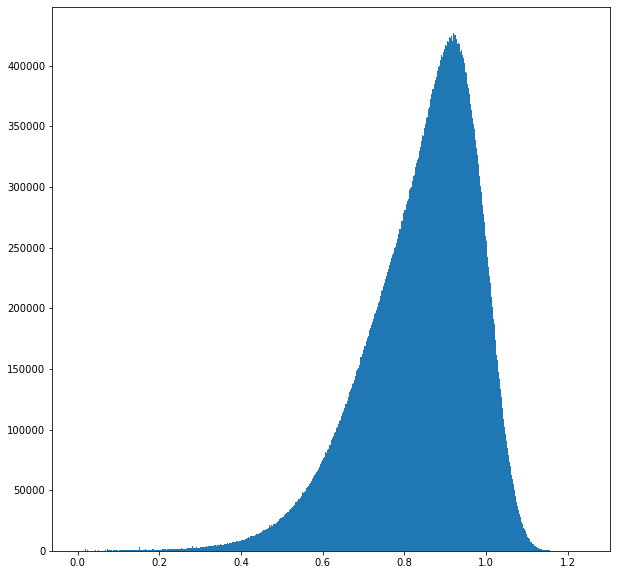

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(p_distances.flatten(), bins=1000)
plt.show()
